**Telco Customer Churn Prediction**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Loading Dataset

df = pd.read_csv('/content/Telco_Customer_Churn.csv')

In [3]:
# Viewing

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['gender'].value_counts(normalize = True)

,proportion
gender,
Male,0.504756
Female,0.495244


In [5]:
# Individual column information
df.info()

# Total charges is on object when it should be float, there is an issue
# Issue could be null value, now to check if there is or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Checking for nulll values

df[df['TotalCharges'].isna()]

# Found no null value

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
# Checking again

df['TotalCharges'].isnull().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
# Converting the column TotalCharges
# coerce is wherever is string, there will be a null value forcefully
# Convereted to numeric now

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [17]:
# Now 11 values null

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [18]:
# Now to drop null value of 11
# If we don't add inplace = True there there will be no change in df.
# df.dropna() both are same just we don't have to place it in df in another way.
# both commands are same.

df.dropna(inplace = True)

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
# NO requirement for customer id so deleted it.

del df['customerID']

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
# In churn there is yes and no.
# If we want to verify any kind of column having how many values we use unique.

df['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [23]:
# Converting No and Yes to 0 and 1 as we can only pass numbers
# Converting the predictor in binary numeric value

df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

/tmp/ipython-input-23-1416841234.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
/tmp/ipython-input-23-1416841234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [25]:
# Using get dummies

df_dummies = pd.get_dummies(df, dtype = int)

In [28]:
df_dummies

# # We had 21 columns now there is 46

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [31]:
# Co-relation
# Multiple options for co-relation, we can make heat map too

df_dummies.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.265987,-0.037529,0.328297,-0.314769,-0.037529,0.361138,-0.314820,-0.037529,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,-0.248033,0.248033,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.360220,-0.763191,0.296447,0.210126,-0.763191,0.441529,0.171057,-0.763191,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0

<Axes: >

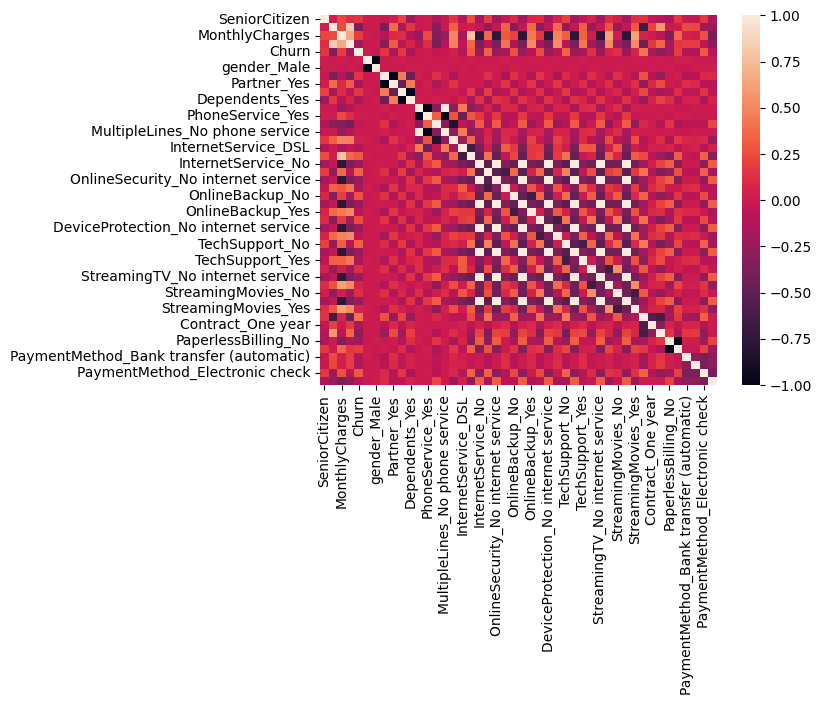

In [34]:
# Using heat map

sns.heatmap(df_dummies.corr())

# Black means highly co-related
# Light value means less co-relation
# This chart is better if there is less columns
# Negatively co-related but highly co-related
# 0 means there is no co-relations
# 1 and -1 is highly co-related


<Axes: >

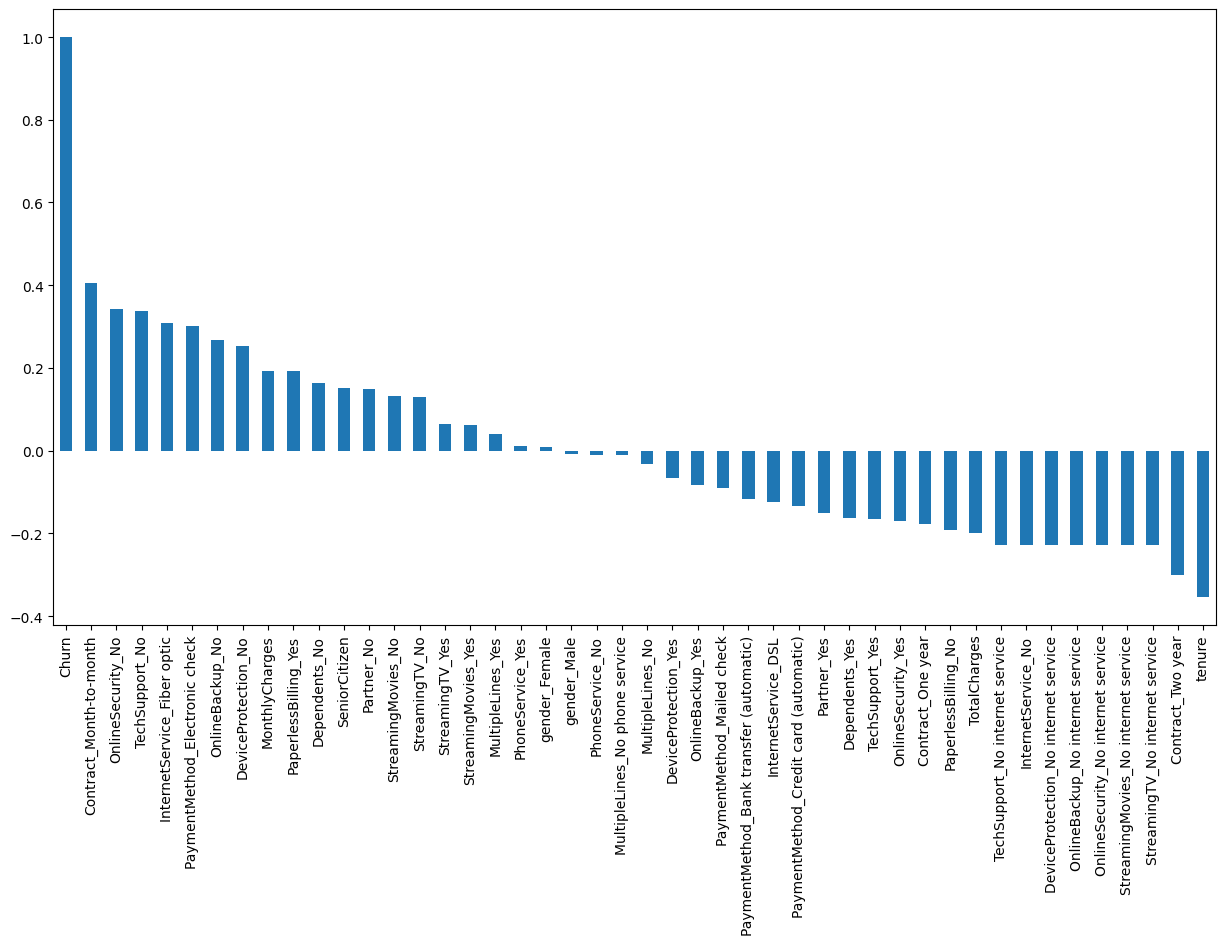

In [37]:
# Second Way

# Churn is depended variable

plt.figure(figsize = (15, 8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

# From the plot we understand that co-relation between churn and  month to month is 0.4 so 40% data is overlapping
# The lest is Tenure, More tenure = less churn

/tmp/ipython-input-43-1889050899.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_dummies[df_dummies['Churn'] == 1]['MonthlyCharges'], color = 'Red', shade = True)
/tmp/ipython-input-43-1889050899.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_dummies[df_dummies['Churn'] == 0]['MonthlyCharges'], color = 'Blue', shade = True)


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

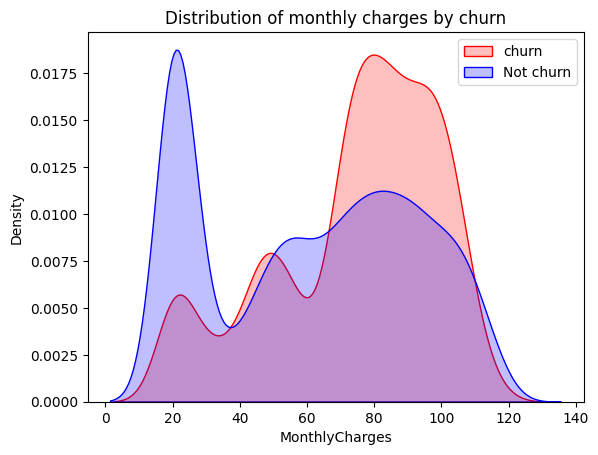

In [43]:
# Churn by monthly charges
# Kdeplot is used to make distribution

ax = sns.kdeplot(df_dummies[df_dummies['Churn'] == 1]['MonthlyCharges'], color = 'Red', shade = True)
ax = sns.kdeplot(df_dummies[df_dummies['Churn'] == 0]['MonthlyCharges'], color = 'Blue', shade = True)
ax.legend(['churn', 'Not churn'])
ax.set_title('Distribution of monthly charges by churn')

# Monthly charges between 60 start and 120
# Higher Monthly charges higher Churn rate
# Churn is less where Monthly charges is less


Machine Learning part

In [46]:
Y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [48]:
# Standard Scaling
# We use scaling when there is distance

from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [50]:
# Distance is not used in random forest

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

#

LogisticRegression()

In [54]:
y_pred_log = model.predict(X_test_scaled)


In [58]:
from sklearn import metrics

print(metrics.accuracy_score(y_pred_log, Y_test))

0.8073916133617626


Axes(0.125,0.11;0.775x0.77)


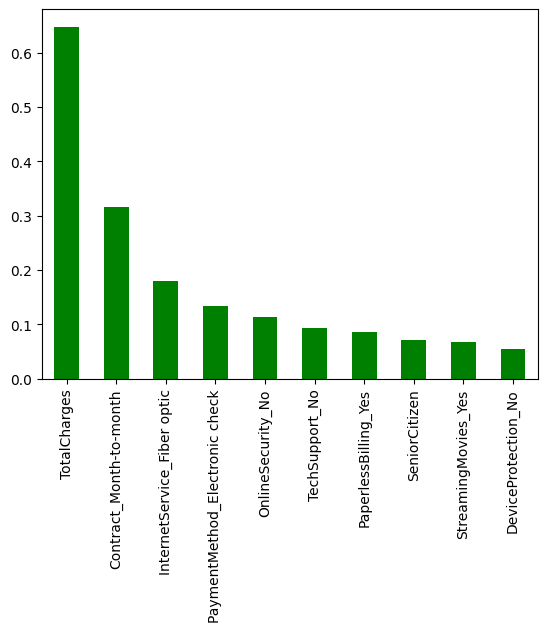

In [63]:
weights = pd.Series(model.coef_[0], index = X.columns.values)

print(weights.sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'green'))

# When we use logistic regression there are coefficients values those are weights

# Total charges is big so churn rate is also big
#

In [64]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1)
model_rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [65]:
y_pred_rf = model_rf.predict(X_test_scaled)

In [68]:
print(metrics.accuracy_score(Y_test, y_pred_rf))

0.7938877043354655


<Axes: >

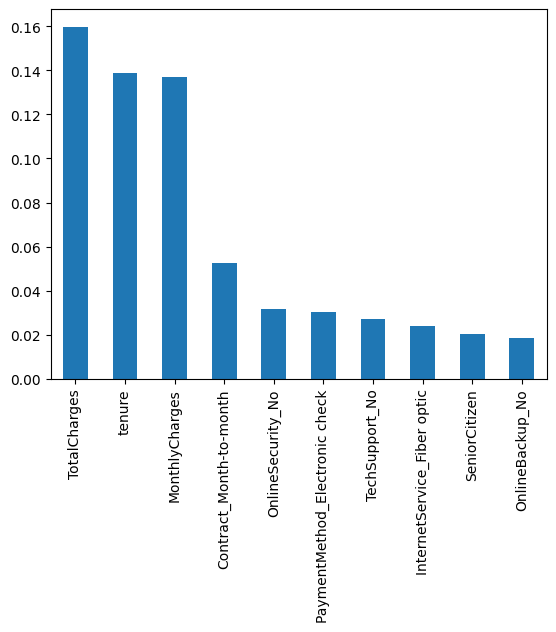

In [72]:
importance = model_rf.feature_importances_
weights = pd.Series(importance, index = X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind = 'bar')

# Important features like total charges, tenure, monthly charges, the first 3 are very important